## Logistic Regression
A supervised machine learning model used for classification tasks.

### Overview

1. **Goal**
- `Primary Objective`: Predict the probability that an instance belongs to a given class or not.
- `Key Outcome`: Predict the categorical outcome $Y$ based on the independent variables $X$, with probabilities that range between 0 and 1.
2. **Why is Logistic Regression Important?**
- `Clarity`: Provides a probabilistic framework, making it easy to interpret the likelihood of different outcomes.
- `Understanding`: Facilitates a deeper understanding of the relationships between independent variables and the probability of the dependent variable belonging to a particular class.
- `Simplicity`: Easy to implement and interpret, particularly when dealing with binary classification problems.
- `Foundation`: Forms the basis for more complex classification algorithms, such as those used in neural networks.
- `Assumption Testing`: Helps validate the relationship between the independent variables and the log-odds of the outcome, ensuring that the model is well-specified.

### Types

1. **Binomial**: Only two possible types of the dependent variables, such as 0 or 1.
2. **Multinomial**: Can be 3 or more possible unordered types of the dependent variables.
3. **Ordinal**: Can be 3 or more possible ordered types of dependent variables, such as "Low", "Medium", or "High".

### Assumptions


1. **Independent Observations**: Each data point is independent; there's no relationship between the input variables.
2. **Binary Outcome**: The outcome variable must have two possible values (e.g., yes/no, 0/1). For more than two outcomes, use the SoftMax function.
3. **Linear Relationship**: The independent variables should have a linear relationship with the log of the odds of the outcome.
4. **No Outliers**: The dataset should be free from extreme values that could distort the analysis.
5. **Sufficient Sample Size**: The dataset should be large enough to provide reliable results.






### Mathematical Concepts

**1. Terminologies**
- Independent Input Variable
  $$
  X = \begin{bmatrix}
  x_{11} & \dots & x_{1m} \\
  x_{21} & \dots & x_{2m} \\
  \vdots & \ddots & \vdots \\
  x_{n1} & \dots & x_{nm}
  \end{bmatrix}
  \
  $$

- Dependent Variable: Only binary vlaue
  $$   Y =
  \begin{cases}
  0 & \text{if Class 1} \\
  1 & \text{if Class 2}
  \end{cases}
  \
  $$
- Multi-linear Function
  $$ z = (\sum_{i=1}^{n} w_ix_i) + b$$
  $$ z = w * X + b$$
  - $x_i$: the $i^(th)$ observation of X
  - $w_i = [w_1, w_2, w_3, ..., w_m]$: the weights or coefficient.
  - $b$ = the bias term (intercept)


**2-1. Sigmoid Function** <br>
A mathematical function used to map the predicted values to probabilities.
- **Purpose**: Converts predicted values into probabilities.
- **Range**: Maps any real value to a value between 0 and 1.
- **Shape**: Forms an S-shaped curve.
- **Behavior**
  - $\sigma(z)$ tends towards 1 as $z -> ∞$.
  - $\sigma(z)$ tends towards 0 as $z -> -∞$.
  - $\sigma(z)$ = always betwen 0 and 1.
- **Threshold Concept**
  - Values above a certain threshold are classified as 1.
  - Values below the threshold are classified as 0.

**2-2. Softmax Function** <br>
A mathematical function that converts a vector of raw scores (logits) into probabilities, with each probability corresponding to the relative likelihood of each class, and the sum of the probabilities is 1.
- **Purpose**: Converts a vector of raw scores (logits) into a probability distribution.
- **Output**: Each probability corresponds to the likelihood of a particular class.
- **Sum of Probabilities**: Always equals 1.
- **Usage**: Often used in multi-class classification problems.

**2-3 Comparison**
1. **Sigmoid Function**:
  - Usage: Binary classification (two possible outcomes).
  - Example:
    - Suppose you have a model that needs to classify whether a digit is a "7" or not.
    - The model outputs a value, and the Sigmoid function converts this value into a probability.
    - If the probability is above a certain threshold (e.g., 0.5), the digit is classified as "7"; otherwise, it's classified as "not 7".
2. **Softmax Function**:
  - Usage: Multi-class classification (multiple possible outcomes).
  - Example:
    - Suppose you have a model that needs to classify a digit as one of the digits from 0 to 9.
    - The model outputs a vector of raw scores (logits) for each digit.
    - The Softmax function converts these logits into a probability distribution across all 10 digits.
    - The digit with the highest probability is chosen as the classification result.
    - For instance, if the model predicts the following probabilities: [0.1, 0.05, 0.1, 0.05, 0.05, 0.05, 0.05, 0.4, 0.1, 0.05], the digit "7" would be the predicted class because it has the highest probability (0.4).

Resource: https://datascience.stackexchange.com/questions/57005/why-there-is-no-exact-picture-of-softmax-activation-function

**3. Formula**
- Odd: The ratio of something occuring to something not occuring.
  $$ \frac{p(x)}{1-p(x)} = e^z$
- Probability: The ratio of something occurring to everything that could possibly occur.


- **Step 1: Log-Odds Transformation** <br>
  The log-odds are modeled as a linear combination of the input variables.
  $$\log(\frac{p(x)}{1 - p(x)}) = z \\ \log(\frac{p(x)}{1 - p(x)}) = w*X + b$$
- **Step 2: Exponentiating Both Sides** <br>
  To solve for the probability $p(x)$, exponentiate both sides
  $$\frac{p(x)}{1 - p(x)} = e^{w \cdot X + b}$$
- **Step 3: Expressing Probability $p(x)$** <br>
  Multiply both sides by $1-p(x)$ to elimiate the fraction
  $$p(x) = e^{w \cdot X + b} \cdot (1 - p(x)) $$
  Distribute $e^{w \cdot X + b}$
  $$p(x) = e^{w \cdot X + b} - e^{w \cdot X + b} \cdot p(x)$$
- **Step 4: Isolating $p(x)$** <br>
  Move the term involving $p(x)$ to the left side
  $$p(x) + e^{w \cdot X + b} \cdot p(x) = e^{w \cdot X + b} $$
  Factor out $p(x)$
  $$p(x) \cdot \left(1 + e^{w \cdot X + b}\right) = e^{w \cdot X + b}$$
  Solve for $p(x)$
  $$p(x) = \frac{e^{w \cdot X + b}}{1 + e^{w \cdot X + b}}$$
- **Step 5: Simplifying and Finalizing the Expression$** <br>
  Simplify
  $$p(x) = \frac{1}{1 + e^{-(w \cdot X + b)}} $$
  Finalize
  $$p(X; b, w) = \frac{1}{1 + e^{-(w \cdot X + b)}}$$


    

**4. Likelihood Function and Gradient** <br>
The predicted probabilities will be:

- for $y=1$ The predicted probabilities will be: $p(X;b,w) = p(x)$
- for $y=0$ The predicted probabilities will be: $1-p(X;b,w) = 1-p(x)$

- **Step 1: Likelihood Function** <br>
  The likelihood function $L(b, w)$: The product of the probabilities of each data point being classified correctly.
  $$L(b, w) = \prod_{i=1}^{n} p(x_i)^{y_i} \cdot (1 - p(x_i))^{1 - y_i}$$
- **Step 2: Log-Likelihood Function** <br>
  Taking the natural logarithm of the likelihood function.
  $$\log(L(b, w)) = \sum_{i=1}^{n} \left[ y_i \log(p(x_i)) + (1 - y_i) \log(1 - p(x_i)) \right]
  $$
- **Step 3: Expanding the Log-Likelihood Function** <br>
  Expanding the terms within the summation.
  $$\log(L(b, w)) = \sum_{i=1}^{n} \left[ y_i \log(p(x_i)) + \log(1 - p(x_i)) - y_i \log(1 - p(x_i)) \right]
  $$
  $$= \sum_{i=1}^{n} \left[ \log(1 - p(x_i)) + y_i \log\left(\frac{p(x_i)}{1 - p(x_i)}\right) \right]
  $$
- **Step 4: Substituting the Sigmoid Function** <br>
  Substitute the sigmoid function
  $$\log(L(b, w)) = \sum_{i=1}^{n} \left[ -\log(1 + e^{w \cdot x_i + b}) + y_i \cdot (w \cdot x_i + b) \right]
  $$
- **Step 5: Differentiation with Respect to
$w$** <br>
  To find the maximum likelihood estimates, differentiate the log-likelihood function with respect to $w_j$
  $$\frac{\partial J(l(b, w))}{\partial w_j} = -\sum_{i=1}^{n} \frac{1}{1 + e^{w \cdot x_i + b}} \cdot e^{w \cdot x_i + b} \cdot x_{ij} + \sum_{i=1}^{n} y_i x_{ij}
  $$
- **Step 6: Simplifying the Gradient** <br>
  Simplify the expression for the gradient
  $$\frac{\partial J(l(b, w))}{\partial w_j} = -\sum_{i=1}^{n} p(x_i; b, w) x_{ij} + \sum_{i=1}^{n} y_i x_{ij}
  $$
  $$= \sum_{i=1}^{n} \left( y_i - p(x_i; b, w) \right) x_{ij}
  $$

In [1]:
import pandas as pd
import numpy as np

# Parameters for dataset
num_samples = 1000  # Total number of samples
num_features = 3    # Number of features
random_state = 42   # For reproducibility

np.random.seed(random_state)

# Generate synthetic data
X = np.random.rand(num_samples, num_features) * 10  # Features between 0 and 10

# Define a new set of weights and a bias
w = np.array([0.5, -0.5, 0.3])  # Adjusted weights
b = -1.5  # Adjusted bias

# Calculate log-odds
log_odds = np.dot(X, w) + b

# Convert log-odds to probabilities using the logistic function
probabilities = 1 / (1 + np.exp(-log_odds))

# Introduce some randomness to create a balance of labels
random_noise = np.random.rand(num_samples) * 0.2
y = (probabilities + random_noise > 0.5).astype(int)

In [2]:
# [Step 3-1] Log-Odds Transformation
z = np.dot(X, w) + b
print(f"Log-odds (z): {z[:5]}")

# [Step 3-2] Exponentiating Both Sides
odds = np.exp(z)
print(f"Odds: {odds[:5]}")

# [Step 3-3] Expressing Probability
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

p_x = sigmoid(z)
print(f"Predicted probabilities (p_x): {p_x[:5]}")

# [Step 4-1] Likelihood Function
likelihood = np.prod(p_x ** y * (1 - p_x) ** (1 - y))
print(f"Likelihood: {likelihood}")

# [Step 4-2] Log-Likelihood Function
log_likelihood = np.sum(y * np.log(p_x) + (1 - y) * np.log(1 - p_x))
print(f"Log-Likelihood: {log_likelihood}")

# [Step 4-6]
gradient_w = np.dot(X.T, (y - p_x))
gradient_b = np.sum(y - p_x)
print(f"Gradient w.r.t w: {gradient_w}")
print(f"Gradient w.r.t b: {gradient_b}")

Log-odds (z): [-2.18488911  1.18118278 -3.73711763  4.84716997  2.14599255]
Odds: [1.12490207e-01 3.25822569e+00 2.38226699e-02 1.27379392e+02
 8.55052387e+00]
Predicted probabilities (p_x): [0.10111568 0.7651604  0.02326836 0.99221059 0.8952937 ]
Likelihood: 2.130378000053789e-113
Log-Likelihood: -259.43581607953683
Gradient w.r.t w: [525.05502657 233.72018125 461.53682102]
Gradient w.r.t b: 78.81210119355057


### Metrics


1. **Accuracy**
- Provides the proportion of correctly classified instances.
2. **Precision**
- Focuses on the accuracy of positive predictions.
3. **Recall (Sensitivity or True Positive Rate)**
- Measures the proportion of correctly predictive positive instances among all actual positive instances.
4. **F1 Score**
- The harmonic mean of precision and recall.
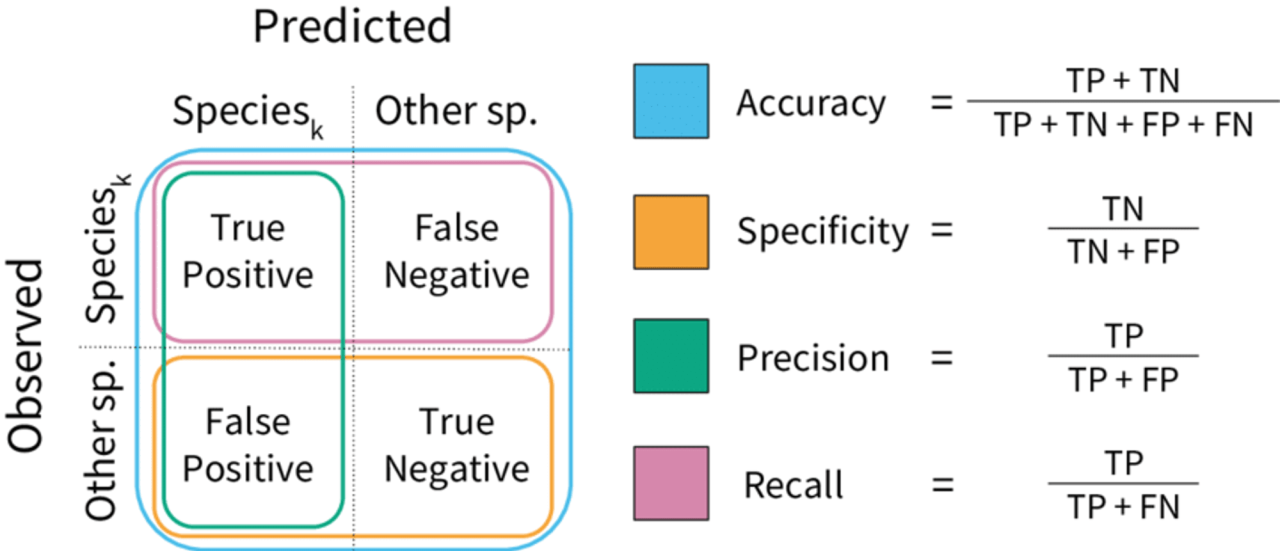
5. **AUC-ROC (Area Under the Receiver Operating Characteristic Curve)**
  - Measures the area under the true positive rate against the false positive rate at various thresholds, providing an aggregate measure of a model's performance across different classification thresholds.
6. **AUC-PR (Area Under the Precision-Recall Curve (AUC-PR)**:
  - Measures the area under the precision-recall curve, providing a summary of a model's performance across different precision-recall trade-offs.

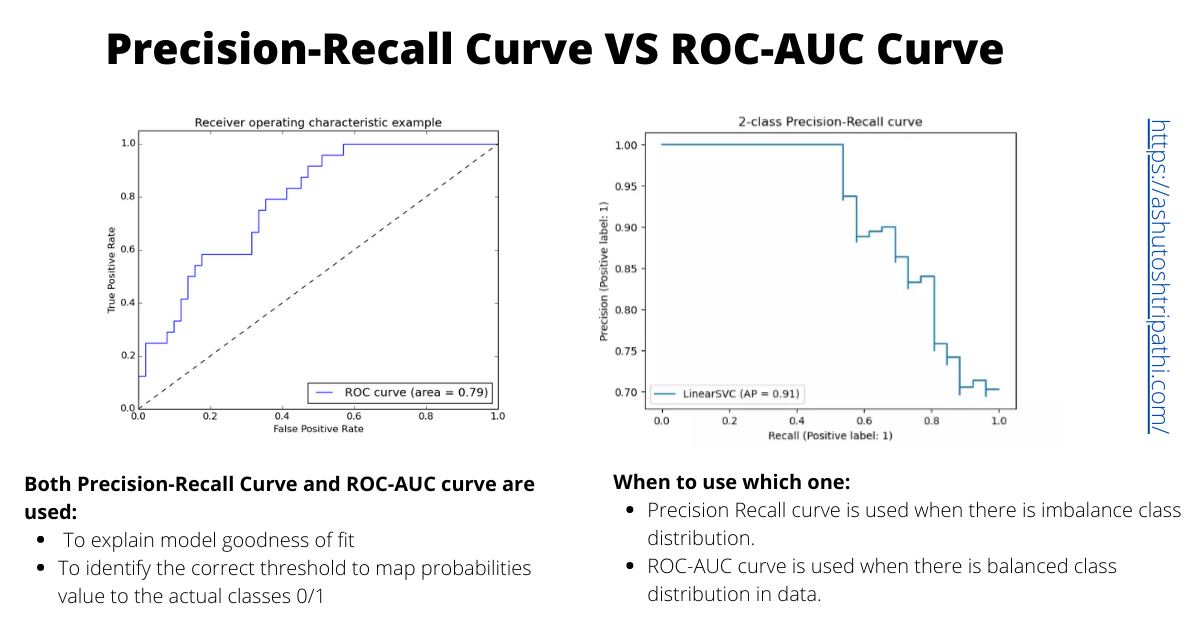

In [3]:
# Binary classification based on a threshold
def predict(p_x, threshold = 0.5):
  return (p_x >= threshold).astype(int)

# Calculate metrics
# Accuracy
def accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    return correct_predictions / len(y_true)

# Precision
def precision(y_true, y_pred):
    true_positive = np.sum((y_pred == 1) & (y_true == 1))
    predicted_positive = np.sum(y_pred == 1)
    return true_positive / predicted_positive if predicted_positive > 0 else 0

# Recall
def recall(y_true, y_pred):
    true_positive = np.sum((y_pred == 1) & (y_true == 1))
    actual_positive = np.sum(y_true == 1)
    return true_positive / actual_positive if actual_positive > 0 else 0

# F1
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    if prec + rec == 0:
        return 0
    return 2 * (prec * rec) / (prec + rec)

# Confusion Matrix
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positive
    tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negative
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positive
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negative
    return np.array([[tn, fp], [fn, tp]])

In [4]:
p_x = sigmoid(z)

y_pred = predict(p_x, threshold=0.5)

acc = accuracy(y, y_pred)
prec = precision(y, y_pred)
rec = recall(y, y_pred)
f1 = f1_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

In [5]:
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.93
Precision: 1.00
Recall: 0.89
F1 Score: 0.94
Confusion Matrix:
[[409   0]
 [ 67 524]]


1. **Accuracy: 0.93 (93%)**
The model correctly classified 93% of the instances. This indicates a strong overall performance; however, accuracy alone can be misleading, especially in cases of imbalanced datasets.

2. **Precision: 1.00 (100%)**
The model achieved perfect precision, meaning all instances predicted as positive were indeed positive. This is an excellent result, indicating that there were no false positives.

3. **Recall: 0.89 (89%)**
The recall value indicates that the model identified 89% of the actual positive cases. While this is good, there is still room for improvement, as about 11% of positive cases were missed (false negatives).

4. **F1 Score: 0.94**
The F1 Score, which balances precision and recall, is quite high. This suggests that the model maintains a good balance between identifying positive instances and minimizing false positives, making it suitable for scenarios where both precision and recall are critical.

5. **Confusion Matrix**: The confusion matrix illustrates that while the model has zero false positives, it does have a considerable number of false negatives. This suggests that while the model is very conservative in predicting positive classes, it sometimes fails to recognize them, which could be critical depending on the application.



> - True Negatives (TN): 409
- False Positives (FP): 0
- False Negatives (FN): 67
- True Positives (TP): 524






In [11]:
# Calculate the ROC curve
def calculate_roc_curve(y_true, y_prob):
    thresholds = np.linspace(0, 1, 100)  # 100 thresholds between 0 and 1
    tpr_list = []
    fpr_list = []

    # Loop through each threshold
    for threshold in thresholds:
        # Predict labels based on the current threshold
        y_pred = (y_prob >= threshold).astype(int)

        # Calculate True Positives, False Positives, True Negatives, and False Negatives
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        TN = np.sum((y_pred == 0) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Calculate TPR and FPR
        TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
        FPR = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate

        tpr_list.append(TPR)
        fpr_list.append(FPR)

    # Convert lists to numpy arrays
    tpr_array = np.array(tpr_list)
    fpr_array = np.array(fpr_list)

    # Sort FPR and TPR based on FPR for AUC calculation
    sorted_indices = np.argsort(fpr_array)
    return fpr_array[sorted_indices], tpr_array[sorted_indices]  # Return sorted FPR and TPR

# Calculate the AUC using the trapezoidal rule
def calculate_auc(x, y):
    return np.trapz(y, x)

# Precision-Recall Curve
def calculate_pr_curve(y_true, y_prob):
    thresholds = np.linspace(0, 1, 100)  # 100 thresholds between 0 and 1
    precision_list = []
    recall_list = []

    # Loop through each threshold
    for threshold in thresholds:
        # Predict labels based on the current threshold
        y_pred = (y_prob >= threshold).astype(int)

        # Calculate True Positives, False Positives, and False Negatives
        TP = np.sum((y_pred == 1) & (y_true == 1))
        FP = np.sum((y_pred == 1) & (y_true == 0))
        FN = np.sum((y_pred == 0) & (y_true == 1))

        # Calculate precision and recall
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        precision_list.append(precision)
        recall_list.append(recall)

    # Convert lists to numpy arrays
    precision_array = np.array(precision_list)
    recall_array = np.array(recall_list)

    # Sort recall and precision based on recall for AUC calculation
    sorted_indices = np.argsort(recall_array)
    return recall_array[sorted_indices], precision_array[sorted_indices]  # Return sorted recall and precision


In [12]:
# Calculate the ROC curve
fpr, tpr = calculate_roc_curve(y, p_x)
auc_roc = calculate_auc(fpr, tpr)
print(f"AUC-ROC: {auc_roc:.2f}")

# Calculate the Precision-Recall curve
recall, precision = calculate_pr_curve(y, p_x)
auc_pr = calculate_auc(recall, precision)
print(f"AUC-PR: {auc_pr:.2f}")

AUC-ROC: 0.99
AUC-PR: 0.98


1. **AUC-ROC 0.99**: The model achieved an AUC-ROC score of 0.99, indicating exceptional performance in distinguishing between the positive and negative classes. This high score reflects a 99% probability that a randomly selected positive instance ranks higher than a randomly selected negative instance.
> - 0.5: Indicates no discrimination; the model performs no better than random chance.
> - 0.7-0.8: Acceptable discrimination.
> - 0.8-0.9: Good discrimination.
> - 0.9-1.0: Excellent discrimination.
2. **AUC-PR 0.98**: The model also recorded an AUC-PR of 0.98, demonstrating a strong balance between precision and recall. This score indicates that the model consistently maintains high precision—ensuring that a significant proportion of predicted positives are indeed true positives—while also effectively capturing a large share of actual positive instances.
> - 0.5: Indicates random performance.
> - 0.7: Acceptable precision and recall.
> - 0.8: Good precision and recall.
> - 0.9: Excellent precision and recall.

### References
1. **Precision-Recall Tradeoff in Logistic Regression Threshold Setting**
- **Threshold Setting**:
  - Logistic regression becomes a classification technique with a decision threshold.
  - The threshold value significantly impacts the tradeoff between precision and recall.
- Precision-Recall Tradeoff:
  - **Low Precision/High Recall**:
    - Goal: Reduce false negatives.
    - Application Example: Cancer diagnosis, where missing a positive case is more critical than incorrectly diagnosing someone with cancer.
  - **High Precision/Low Recall**:
    - Goal: Reduce false positives.
    - Application Example: Personalized advertising, where it’s important to ensure a positive customer reaction, even if it means missing some potential customers.

Resources
- https://ashutoshtripathi.com/2022/01/09/what-is-the-difference-between-precision-recall-curve-vs-roc-auc-curve/
- https://www.linkedin.com/pulse/why-accuracy-can-deceptive-product-managers-guide-recall-prasmit-quxhc